In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# return [W x H x threshold_T x 1]
fpaths = np.load("/mnt/d/Datasets/simple_fpath_data/fpath_npzs/color_900_fpath_of_infodraw.npz")['data']

# reshape to [WH x threshold_T]
w, h, t = fpaths.shape
fpaths_linear = fpaths.reshape(w * h, t) 

# return image of [H x W x C]
target = cv2.imread("../inputs/simple_data/targets/line_900.png")
# convert gray scale image of [H x W]
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY).astype(np.float32)
target_gray = cv2.normalize(target_gray, None, 0.0, 1.0, cv2.NORM_MINMAX)

# transpose to [W x H]
target_gray = target_gray.transpose(1, 0)
w_t, h_t = target_gray.shape

assert w == w_t and h == h_t, f"w, w_t and h, h_t must be same. but {w=}, {w_t=}, {h=}, {h_t=}"

# reshape to [WH x 1]
target_linear = target_gray.reshape(w_t * h_t, 1)

In [32]:
print(f"{fpaths_linear.shape=}, {target_linear.shape=}")
print(fpaths_linear[:, 10], target_linear[:, 0])

fpaths_linear.shape=(1048576, 21), target_linear.shape=(1048576, 1)
[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]


In [33]:
print(np.sum(fpaths_linear[:, 10] - target_linear[:, 0]))
print(np.min(fpaths_linear), np.max(fpaths_linear))

8916.459
0.0 2.0


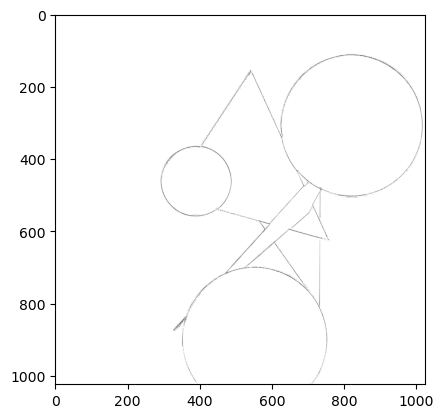

In [34]:
plt.imshow(fpaths_linear[:, 10].reshape(w, h), cmap='gray')

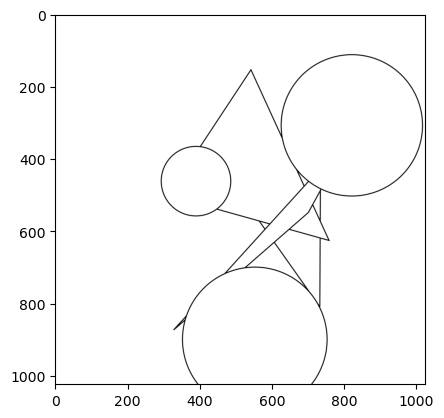

In [35]:
plt.imshow(target_linear[:, 0].reshape(w, h), cmap='gray')

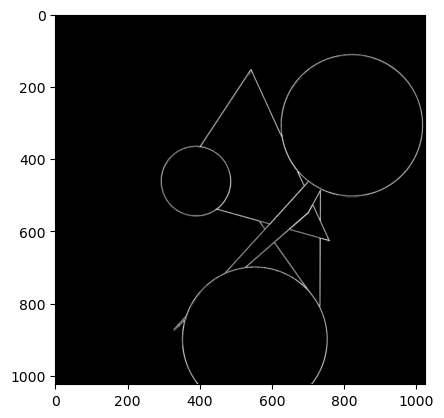

In [36]:
error = np.abs(fpaths_linear[:, 10] - target_linear[:, 0])
plt.imshow(error.reshape(w, h), cmap='gray')

In [37]:
print(f"{np.min(error)=}, {np.max(error)=}")

np.min(error)=0.0, np.max(error)=1.0


In [38]:
fpath_target_concat = np.concatenate([fpaths_linear, target_linear], axis=1)

cv2.imwrite("error.png", error.reshape(w, h) * 255)
cv2.imwrite("error.png", error.reshape(w, h) * 255)
cv2.imwrite("fpath_for_black.png", fpath_target_concat[np.where(target_linear == 0.0)[0]] * 255)
cv2.imwrite("fpath_for_white.png", fpath_target_concat[np.where(target_linear == 1.0)[0]][20000:30000] * 255)

True